# **Primera Oportunidad - Examen Nº1**


Preparacion del Entorno y Carga de Datos

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path = "/content/drive/MyDrive/BBDD/WA_Fn-UseC_-Telco-Customer-Churn.csv" #carga del archivo y creacion de un DF en pandas.
df = pd.read_csv(path)
#miraremos las primeras filas, para ver que los datos se han cargado correctamente.
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**Limpieza de Datos**
* Identificar y solucionar cualquier valor duplicado.
* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325)


In [5]:
#Verificacion de datos duplicados
df.duplicated().sum()

np.int64(0)

In [6]:
#información general del DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


**Comentario:** He verificado que no existen columnas duplicadas. No obstante, algunas tienen un tipo de dato object que no es el más adecuado, ya que contienen pocos valores únicos. Utilizando el método nunique(), identifiqué estas columnas y, para optimizar el uso de memoria y mejorar el análisis, procederé a cambiar su tipo de dato a category

In [9]:
for col in df.select_dtypes(include='object').columns: #Selección de todas las columnas del df en las que su tipo de dato es object.
    df[col] = df[col].astype('category') #reemplazo de las columnas asignando como tipo de dato category.

In [10]:
df.info() #se comprueba el cambio, sin embargo en la columna "TotalCharges" de object se transformo a category y esta debe ser float, por que se trata de dienro.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [20]:
#df['TotalCharges'] = df['TotalCharges'].astype(float)  Utilizar este codigo me arrojó errores por que seguro habian valores vacios o no completados
#que no eran detectados en el .info()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #forma mas adecuada de hacer el cambio transformando los valores 0 o '' a , ya que convierte los valores no validos en NaN
df['TotalCharges'][df['TotalCharges'].isna()]

,TotalCharges
488,NaN
753,NaN
936,NaN
1082,NaN
1340,NaN
3331,NaN
3826,NaN
4380,NaN
5218,NaN
6670,NaN


# **Exploracion de datos con Python.**
* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear copia limpia del DataFrame sin NaN en las columnas relevantes
df_clean = df.copy()
df_clean = df_clean.dropna(subset=['TotalCharges', 'MonthlyCharges'])

# **Exploracion Univariada**

**Grafico de Barras**

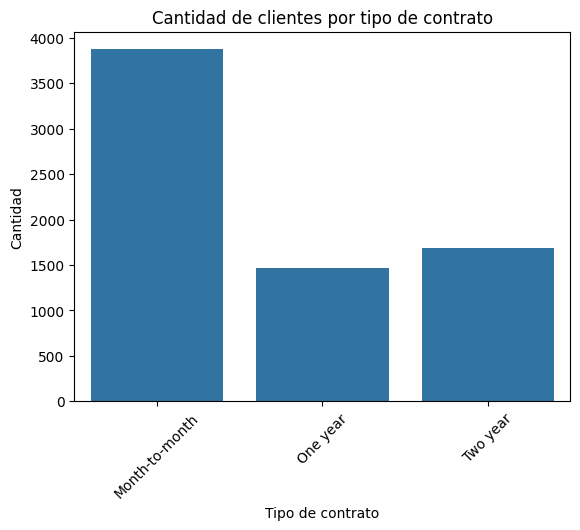

In [23]:
plt.figure()
sns.countplot(x='Contract', data=df_clean)
plt.title('Cantidad de clientes por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()
#La mayoría de los clientes tienen contratos mensuales (Month-to-month), mientras que los contratos de uno o dos años son mucho menos frecuentes

**PieChart**

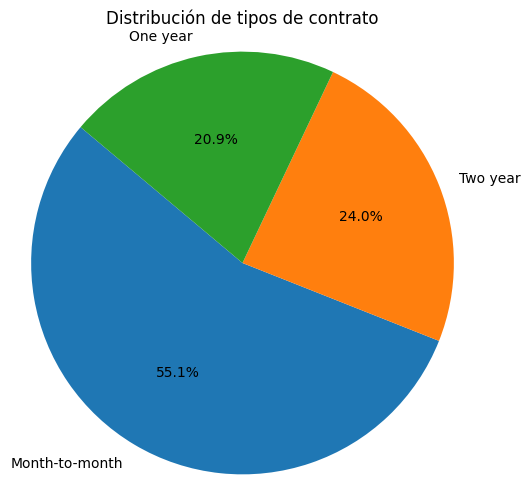

In [24]:
contract_counts = df_clean['Contract'].value_counts()

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de tipos de contrato')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.show()
#La mayoría de los ingresos dependen de clientes con contratos mensuales, lo que representa un mayor riesgo de cancelación para la empresa al no haber compromiso de permanencia

# **Exploracion Multivariada**

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

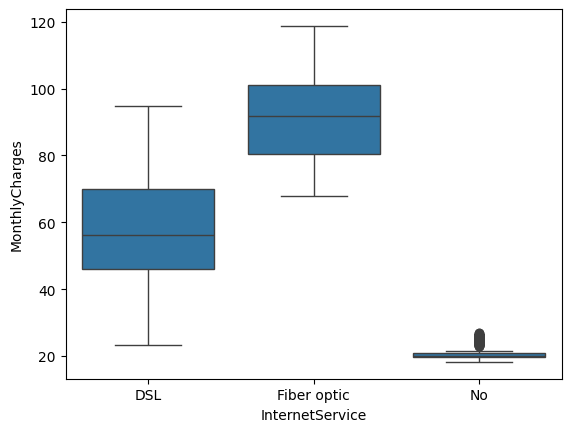

In [25]:
#Boxplot: MonthlyCharges según tipo de InternetService
sns.boxplot(x='InternetService', y='MonthlyCharges', data=df_clean)
#Los clientes que no se dieron de baja (Churn = No) tienen cargos acumulados más altos, lo que sugiere que los clientes más antiguos tienden a permanecer más tiempo

<Axes: xlabel='tenure', ylabel='TotalCharges'>

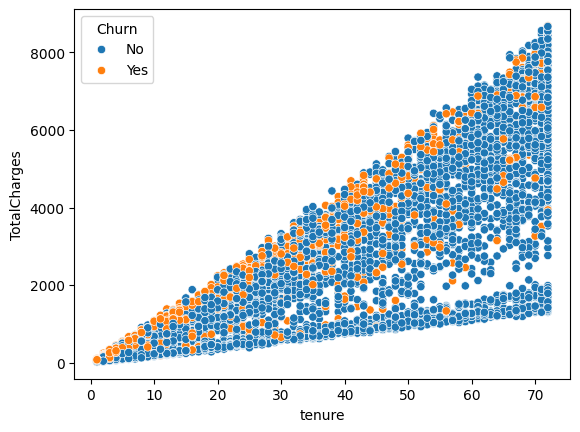

In [26]:
#Gráfico de dispersión: tenure vs. TotalCharges con color según Churn
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df_clean)
#Los clientes que se dieron de baja suelen tener menos tiempo con la empresa y menores cargos acumulados.